In [3]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("DailyDelhiClimateTest.csv")
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [5]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print("Dimensi x_train : ", x_train.shape)
print("Dimensi x_test  : ", x_test.shape)
print("Dimensi y_train : ", y_train.shape)
print("Dimensi y_test  : ", y_test.shape)

Dimensi x_train :  (91, 4)
Dimensi x_test  :  (23, 4)
Dimensi y_train :  (91,)
Dimensi y_test  :  (23,)


# NORMALISASI

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(
    df[["meantemp", "humidity","wind_speed","meanpressure"]]
)

In [8]:
data_normalization = pd.DataFrame(x_scaled)
data_normalization.head()

,0,1,2,3
0,0.209066,0.872396,0.075640,0.000000
1,0.319149,0.761651,0.084061,0.995298
2,0.260047,0.821416,0.146661,0.995356
3,0.327660,0.669797,0.176133,0.992624
4,0.314421,0.732480,0.106684,0.991206


# Data transforming (Standarisasi)

In [9]:
np.std(df)

c:\Users\TUF-GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


meantemp         6.332115
humidity        18.984267
wind_speed       3.572278
meanpressure    89.081395
dtype: float64

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [11]:
x_scaled2 = ss.fit_transform(
    df[["meantemp", "humidity","wind_speed","meanpressure"]]
)

In [12]:
data_standarization = pd.DataFrame(x_scaled2)
data_standarization.head()

,0,1,2,3
0,-0.915971,1.559776,-1.511765,-10.608670
1,-0.507426,1.104275,-1.469505,0.159884
2,-0.726766,1.350093,-1.155357,0.160508
3,-0.475841,0.726477,-1.007459,0.130947
4,-0.524973,0.984293,-1.355976,0.115605


In [13]:
np.std(x_scaled2)

1.0

In [14]:
np.mean(x_scaled2)

2.1425356615573195e-17

# Data Visual dari Dataset

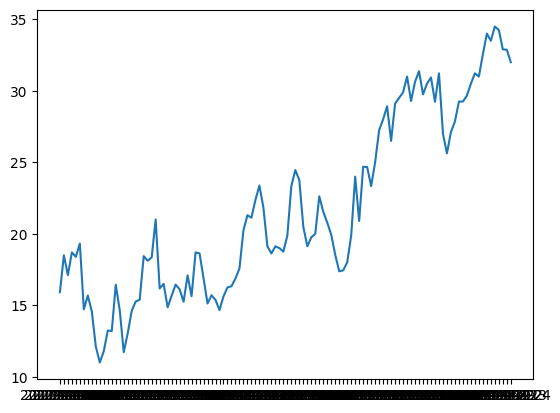

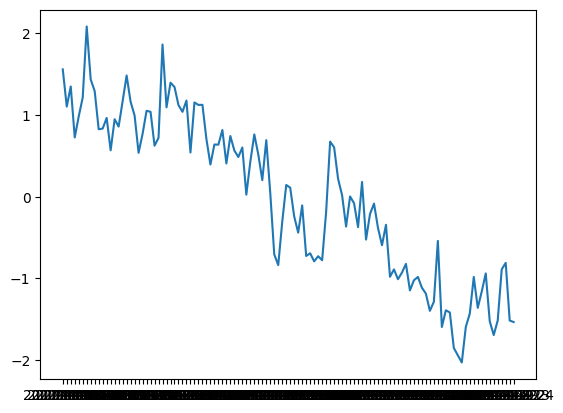

<Figure size 500x500 with 0 Axes>

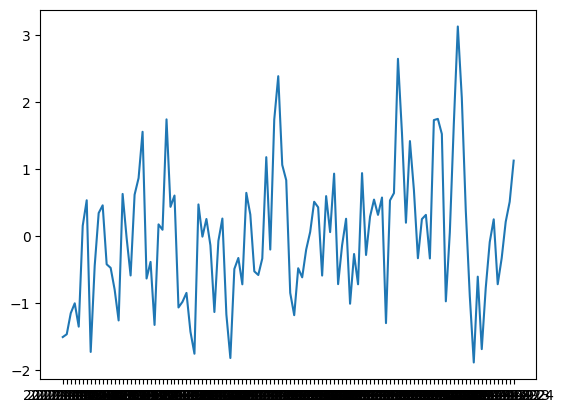

<Figure size 500x500 with 0 Axes>

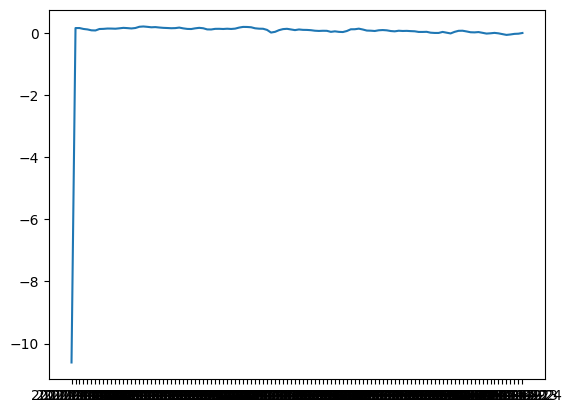

<Figure size 500x500 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

plt.plot(df.date, df.meantemp)
plt.show()

plt.plot(df.date, data_standarization[1])
plt.figure(figsize=(5,5))
plt.show()

plt.plot(df.date, data_standarization[2])
plt.figure(figsize=(5,5))
plt.show()

plt.plot(df.date, data_standarization[3])
plt.figure(figsize=(5,5))
plt.show()

# Data Cleaning

In [16]:
df = pd.read_csv("DailyDelhiClimateTestRusak.csv")

df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [17]:
df[9:21]

,date,meantemp,humidity,wind_speed,meanpressure
9,2017-01-10,12.111111,71.944444,9.361111,1016.888889
10,2017-01-11,11.000000,72.111111,9.772222,1016.777778
11,2017-01-12,11.789474,NaN,NaN,NaN
12,2017-01-13,13.235294,NaN,NaN,NaN
13,2017-01-14,13.200000,NaN,NaN,NaN
14,2017-01-15,16.434783,NaN,NaN,NaN
15,2017-01-16,14.650000,NaN,NaN,NaN
16,2017-01-17,11.722222,NaN,NaN,NaN
17,2017-01-18,13.041667,NaN,NaN,NaN
18,2017-01-19,14.619048,75.142857,10.338095,1022.809524


## menangani Nilai NULL

In [18]:
df.isna().sum()

date             0
meantemp         9
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df["meantemp"] = imputer.fit_transform(df[["meantemp"]])

df.isna().sum()

date             0
meantemp         0
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

In [20]:
df[93:102]

,date,meantemp,humidity,wind_speed,meanpressure
93,2017-04-04,21.001775,NaN,NaN,1007.200000
94,2017-04-05,21.001775,NaN,NaN,1005.000000
95,2017-04-06,21.001775,NaN,NaN,1002.888889
96,2017-04-07,21.001775,NaN,NaN,1007.375000
97,2017-04-08,21.001775,NaN,NaN,1010.375000
98,2017-04-09,21.001775,NaN,NaN,1010.625000
99,2017-04-10,21.001775,NaN,NaN,1008.571429
100,2017-04-11,29.250000,17.75,15.5125,1006.250000
101,2017-04-12,29.250000,26.00,9.4875,1005.875000


# Imputer menggunakan fungsi dari pandas

In [21]:
df["humidity"] = df["humidity"].fillna(df["humidity"].mean())

In [22]:
df.fillna(df.mean())

C:\Users\TUF-GAMING\AppData\Local\Temp\ipykernel_23428\634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-14,30.500000,37.625000,1.387500,1004.625000
110,2017-04-15,31.222222,30.444444,5.966667,1002.444444
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [23]:
df.isna().sum()

date             0
meantemp         0
humidity         0
wind_speed      16
meanpressure     7
dtype: int64

# Menangani Nilai Duplikat

In [24]:
df[df.duplicated()]

,date,meantemp,humidity,wind_speed,meanpressure
108,2017-04-13,29.666667,29.111111,4.944444,1006.777778
109,2017-04-14,30.500000,37.625000,1.387500,1004.625000
110,2017-04-15,31.222222,30.444444,5.966667,1002.444444


In [25]:
df.duplicated().sum()

3

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df[df.duplicated()]

,date,meantemp,humidity,wind_speed,meanpressure


In [28]:
df.duplicated().sum()

0

# Encoding Ordinal 

In [29]:
from sklearn.preprocessing import OrdinalEncoder
# buat data series

nama = ["ananta", "awan", "fikri", "bayu", "herni","tito","alfi","kania","firdaus","syaban"]

hobi = ["tidur","tidur","tidur","baca","mancing","baca","rokok","rokok","rokok","masak"]

# buat DataFrame Baru (custom)

df = pd.DataFrame({"nama":nama, "hobi":hobi})

df.head(10)

,nama,hobi
0,ananta,tidur
1,awan,tidur
2,fikri,tidur
3,bayu,baca
4,herni,mancing
5,tito,baca
6,alfi,rokok
7,kania,rokok
8,firdaus,rokok
9,syaban,rokok


In [30]:
encoder = OrdinalEncoder()
df["hobi_encoded"] = encoder.fit_transform(df[["hobi"]])

df.head(10)

,nama,hobi,hobi_encoded
0,ananta,tidur,3.0
1,awan,tidur,3.0
2,fikri,tidur,3.0
3,bayu,baca,0.0
4,herni,mancing,1.0
5,tito,baca,0.0
6,alfi,rokok,2.0
7,kania,rokok,2.0
8,firdaus,rokok,2.0
9,syaban,rokok,2.0


# Encoding One_Hot Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse=False)
hobi_encoded2 = onehotencoder.fit_transform(df[["hobi"]])

df2 = pd.DataFrame(hobi_encoded2)
df = df.join(df2)
df.head()

,nama,hobi,hobi_encoded,0,1,2,3
0,ananta,tidur,3.0,0.0,0.0,0.0,1.0
1,awan,tidur,3.0,0.0,0.0,0.0,1.0
2,fikri,tidur,3.0,0.0,0.0,0.0,1.0
3,bayu,baca,0.0,1.0,0.0,0.0,0.0
4,herni,mancing,1.0,0.0,1.0,0.0,0.0
